<a href="https://colab.research.google.com/github/mkwak92/food_sales_predictions/blob/main/Food_Sales_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 Machine Learning (cont.)
- Matthew Kwak

- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  
- Perform a train test split 
- Create a preprocessing object to prepare the dataset for Machine Learning
Make sure your imputation of missing values occurs  after the train test split using SimpleImputer.  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')

filename= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTjJvfknetCj7XU5ZzDHiFUvloXpJnaakjRJjE8U8r5JMRnIdE_HIeFr3ODrNsUi8djGxvuQThaJsl7/pub?gid=1975659408&single=true&output=csv'
df = pd.read_csv(filename, header=0)
df.head()
ml_df = df.copy()

- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [ ]:
def eval_regression(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

# Data Cleaning

In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
ml_df.duplicated().sum()

0

In [ ]:
ml_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
ml_df['Item_Fat_Content'].replace({'Low Fat':0, 'low fat':0,'LF':0,'Regular':1,'reg':1},inplace=True)

In [ ]:
ml_df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
ml_df['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace=True)

In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 799.2+ KB


In [ ]:
ml_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
ml_df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,6113.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,1997.831867,0.761819,2181.288914
std,4.643456,0.477836,0.051598,62.275067,8.371760,0.697463,1706.499616
min,4.555000,0.000000,0.000000,31.290000,1985.000000,0.000000,33.290000
25%,8.773750,0.000000,0.026989,93.826500,1987.000000,0.000000,834.247400
50%,12.600000,0.000000,0.053931,143.012800,1999.000000,1.000000,1794.331000
75%,16.850000,1.000000,0.094585,185.643700,2004.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,2009.000000,2.000000,13086.964800


- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [ ]:
X = ml_df.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'], axis=1)
y = ml_df['Item_Outlet_Sales']

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,Dairy,249.8092,1999,1.0,Tier 1,Supermarket Type1
1,5.920,1,0.019278,Soft Drinks,48.2692,2009,1.0,Tier 3,Supermarket Type2
2,17.500,0,0.016760,Meat,141.6180,1999,1.0,Tier 1,Supermarket Type1
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store
4,8.930,0,0.000000,Household,53.8614,1987,2.0,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,1987,2.0,Tier 3,Supermarket Type1
8519,8.380,1,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1
8520,10.600,0,0.035186,Health and Hygiene,85.1224,2004,0.0,Tier 2,Supermarket Type1
8521,7.210,1,0.145221,Snack Foods,103.1332,2009,1.0,Tier 3,Supermarket Type2


- Perform a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [248]:
len(X_train)

6392

In [249]:
len(y_train)

6392

In [250]:
len(y_test)

2131

In [254]:
len(X_test)

2131

# Create Preprocessing and pipeline

- Create a preprocessing object to prepare the dataset for Machine Learning Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_cols = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
ord_cols = ['Item_Fat_Content','Outlet_Size'] #item fat content, outlet_size is ordinal from above 


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   float64
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 599.4+ KB


In [ ]:
most_frequent_imputer = SimpleImputer(strategy='most_frequent') #most frequent since I updated this to numbers earlier for Outlet_Size
mean_imputer = SimpleImputer(strategy='mean') #for Item_Weight

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
num_pipe = make_pipeline(mean_imputer,scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
cat_pipe = make_pipeline(ohe)
cat_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
ord_pipe = make_pipeline(most_frequent_imputer,scaler) #made this extra pipeline due to updates from above and I wanted to have a mean average for Item Weight
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [ ]:
num_tuple = (num_pipe, num_cols)
cat_tuple = (cat_pipe, cat_selector)
ord_tuple = (ord_pipe, ord_cols)

In [ ]:
preprocessor = make_column_transformer(num_tuple,cat_tuple,ord_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f73bdf10e50>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size'])])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f73bdf10e50>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size'])])

In [ ]:
#transform
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
#This code was extracted from LP 
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data of X_train is', X_train_processed.shape)
print('shape of data X_test is', X_test_processed.shape)
print('\n')
X_train_processed



0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data of X_train is (6392, 29)
shape of data X_test is (2131, 29)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
        -0.7403206 ,  0.28737371],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.35076614,  0.28737371],
       [-0.13151196,  1.81331864,  0.24454056, ...,  0.        ,
         1.35076614,  0.28737371],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  0.        ,
        -0.7403206 ,  0.28737371],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  0.        ,
        -0.7403206 ,  0.28737371],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  0.        ,
        -0.7403206 , -1.38404828]])

In [ ]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,8.172487e-01,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.740321,0.287374
1,5.563395e-01,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.350766,0.287374
2,-1.315120e-01,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.350766,0.287374
3,-1.169219e+00,-1.004931,-0.952591,0.732018,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.740321,-1.384048
4,1.528819e+00,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.740321,0.287374
5,4.213344e-16,-0.114462,-0.508205,-1.532139,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.350766,-1.384048
6,1.884604e+00,-0.074214,-0.859553,0.732018,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.350766,-1.384048
7,4.213344e-16,-0.047974,1.942997,-1.532139,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.350766,0.287374
8,1.611836e+00,1.851567,1.799954,0.732018,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.350766,-1.384048
9,-1.119409e+00,-0.533682,-0.416764,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.740321,-1.384048


# Create a Linear Regression
- Build a Linear Regression Model
- Evaluate the performance of your model based on r^2
- Evaluate the performance of your model based on rmse

In [ ]:
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()

In [ ]:
reg_pipe = make_pipeline(reg_lin)
reg_pipe

Pipeline(steps=[('linearregression', LinearRegression())])

In [ ]:
reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [ ]:
reg_pipe_pred_train = reg_pipe.predict(X_train_processed)

In [ ]:
reg_pipe_pred_test = reg_pipe.predict(X_test_processed)

In [ ]:
eval_regression(y_train, reg_pipe_pred_train)

MAE 847.4170862441568,
 MSE 1300450.9691665014,
 RMSE: 1140.3731710131124,
 R^2: 0.560577653797139 


In [ ]:
eval_regression(y_test, reg_pipe_pred_test)

MAE 805.2705998928618,
 MSE 1197572.9147431627,
 RMSE: 1094.3367465013512,
 R^2: 0.5659359284921062 


- The model is showing about 56.1% of the variance on the target on the training set and 56.59% of the vairance on the target on the test set. The model has a bit a medium bias as it R2 number is sitting around 56%. There could be some outside variables that may be causing the model to not predict as well.

# Regression Tree Model - Decision Tree



In [ ]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
dec_tree = DecisionTreeRegressor(random_state=42)

In [ ]:
dec_tree.fit(X_train_processed,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
dec_train_pred = dec_tree.predict(X_train_processed)
dec_test_pred = dec_tree.predict(X_test_processed)

In [ ]:
#Evaluate the model
dec_train_score = dec_tree.score(X_train_processed,y_train)
dec_test_score = dec_tree.score(X_test_processed,y_test)
print(dec_train_score)
print(dec_test_score)

1.0
0.1795366622091431


In [ ]:
dec_tree.get_depth()

40

In [ ]:
dec_tree.get_n_leaves()

6262

In [ ]:
#Get values for values between the 0-20 
dec_depths = list(range(2,41)) #every values from 0-20
print(dec_depths)
#create a dataframe to store the score
dec_scores = pd.DataFrame(index=dec_depths, columns=['Test Score','Train Score'])
for depth in dec_depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  dec_tree.fit(X_train_processed, y_train)
  dec_train_score = dec_tree.score(X_train_processed,y_train)
  dec_test_score = dec_tree.score(X_test_processed,y_test)
  dec_scores.loc[depth, 'Train Score'] = dec_train_score
  dec_scores.loc[depth, 'Test Score'] = dec_test_score

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


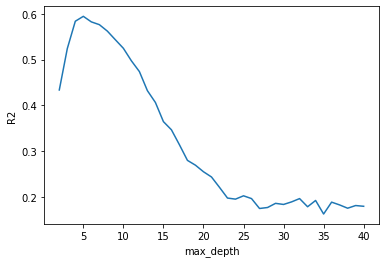

In [ ]:
plt.plot(dec_depths,dec_scores['Test Score'])
plt.xlabel('max_depth')         
plt.ylabel('R2');

In [ ]:
#sort the list
dec_sorted_scores = dec_scores.sort_values(by='Test Score', ascending = False)
dec_sorted_scores.head()

,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582587,0.615072
7,0.576544,0.626454
8,0.562411,0.642714


In [ ]:
# Run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(f'The Train score is: {train_5_score}')
print(f'The Test score is: {test_5_score}')


The Train score is: 0.6039397477322958
The Test score is: 0.5947099753159972


In [ ]:
eval_regression(y_train, dec_tree_5.predict(X_train_processed))

MAE 762.6101695559577,
 MSE 1172122.7729098853,
 RMSE: 1082.6461900869947,
 R^2: 0.6039397477322958 


In [ ]:
eval_regression(y_test, dec_tree_5.predict(X_test_processed))

MAE 738.3173097797824,
 MSE 1118185.973077762,
 RMSE: 1057.4431299496734,
 R^2: 0.5947099753159972 


- The model is showing about 60.39% of the variance on the target on the training set and 59.47% of the vairance on the target on the test set. The model has a bit a medium bias as the R2 number is sitting around 60%. There could be some outside variables that may be causing the model to not predict as well.

# Regression Tree Model - Bagged Tree Model



In [ ]:
from sklearn.ensemble import BaggingRegressor #import bagging regressor
bagreg = BaggingRegressor(random_state=42)

In [ ]:
bagreg.fit(X_train_processed,y_train)

BaggingRegressor(random_state=42)

In [ ]:
#predict bag on TRAIN SET
bagreg_pred_train = bagreg.predict(X_train_processed)

In [ ]:
#predict bag on TEST SET
bagreg_pred_test = bagreg.predict(X_test_processed)

In [ ]:
#Evaluate the model
bagreg_train_score = bagreg.score(X_train_processed,y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9176333699160624
0.5263969071947812


In [ ]:
#estimator values
estimators = [10,50,60,70,80,90,100,130,140,150,200,210,220,230]
bagreg_scores = pd.DataFrame(index=estimators,columns=['Train Score','Test Score'])

for num_estimators in estimators:
  bagreg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
  bagreg.fit(X_train_processed,y_train)
  bagreg_train_score = bagreg.score(X_train_processed,y_train)
  bagreg_test_score = bagreg.score(X_test_processed,y_test)
  bagreg_scores.loc[num_estimators, 'Train Score'] = bagreg_train_score
  bagreg_scores.loc[num_estimators, 'Test Score'] = bagreg_test_score

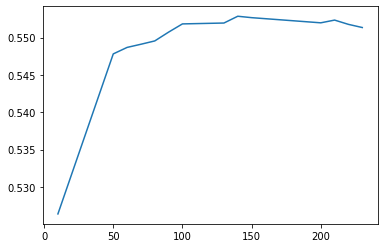

In [ ]:
plt.plot(bagreg_scores['Test Score']);

In [ ]:
bagreg_scores = bagreg_scores.sort_values(by='Test Score', ascending = False)
bagreg_scores

,Train Score,Test Score
140,0.938403,0.552857
150,0.938411,0.552667
210,0.938922,0.552342
200,0.938903,0.551977
130,0.938101,0.551948
100,0.937434,0.551831
220,0.938994,0.551769
230,0.938985,0.551346
90,0.937055,0.550732
80,0.936773,0.549552


In [ ]:
# instantiate and fit the best version of the model
bag_reg_tuned = BaggingRegressor(n_estimators = 140)
bag_reg_tuned.fit(X_train_processed,y_train)

# Evaluate the model 
print(f'The Train score is:', bag_reg_tuned.score(X_train_processed, y_train))
print(f'The Test score is:', bag_reg_tuned.score(X_test_processed, y_test))

The Train score is: 0.9382215037204403
The Test score is: 0.552649901934082


In [ ]:
eval_regression(y_train, bag_reg_tuned.predict(X_train_processed))

MAE 297.3672938288933,
 MSE 182830.72323161573,
 RMSE: 427.58709432303465,
 R^2: 0.9382215037204403 


In [ ]:
eval_regression(y_train, bag_reg_tuned.predict(X_test_processed))

MAE 787.3789541999062,
 MSE 1306660.176484586,
 RMSE: 1143.0923744319994,
 R^2: 0.5263969071947812 


- The model is showing about 93.82% of the variance on the target on the training set and 52.64% of the vairance on the target on the test set. The model is overfitting as it has a high R2 score for the training set and a much lower R2 for the test set.

# Regression Tree Model - Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_pred_train = rf.predict(X_train_processed)
rf_pred_test = rf.predict(X_test_processed)

In [ ]:
#Evaluate the model
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9376795944001952
0.5510855566019801


In [ ]:
#Get the max depth 
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)


42

In [ ]:
rf_depths = range(1, max(est_depths))
rf_scores = pd.DataFrame(index=rf_depths, columns=['Test Score'])
for depth in rf_depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train_processed, y_train)
   rf_scores.loc[depth, 'Train Score'] = model.score(X_train_processed, y_train)
   rf_scores.loc[depth, 'Test Score'] = model.score(X_test_processed, y_test)
   rf_scores.head()


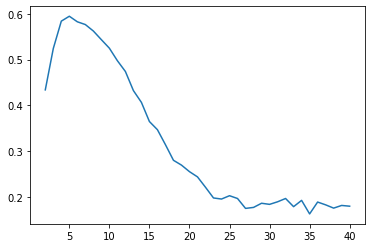

In [ ]:
plt.plot(dec_depths,dec_scores['Test Score']);

In [ ]:
rf_scores = rf_scores.sort_values(by='Test Score', ascending = False)
rf_scores.head()
# 22 is the best depth

,Test Score,Train Score
5,0.603317,0.610297
6,0.601245,0.624702
7,0.598444,0.642526
4,0.597782,0.596357
8,0.594532,0.663553


In [ ]:
# using 22 as the best max depth choose n_estimators
n_ests = [10,20,30,40,50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=5, n_estimators=n)
   model.fit(X_train_processed, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train_processed, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test_processed, y_test)



In [ ]:
scores2 = scores2.sort_values(by='Test Score', ascending = False)
scores2.head()

,Test Score,Train Score
200,0.603297,0.61052
30,0.602965,0.609895
150,0.602945,0.610354
20,0.602896,0.609103
250,0.602725,0.610563


In [ ]:
eval_regression(y_train, model.predict(X_train_processed))

MAE 755.0750430249775,
 MSE 1152240.9988003864,
 RMSE: 1073.4248920163843,
 R^2: 0.6106577986492563 


In [ ]:
eval_regression(y_test, model.predict(X_test_processed))

MAE 728.7554376038553,
 MSE 1095663.9497252242,
 RMSE: 1046.739676197107,
 R^2: 0.6028731535531195 


- The model is showing about 61.07% of the variance on the target on the training set and 60.29% of the vairance on the target on the test set. The model is showing a medium bias as the R2 is not very high but the train and test set are similar. 

# Recommendation:
- My recommendation would be to use the Random Forest Model. The Bagged Tree model was too overfitting. The Random Forest Model compared to the Linear Regression and Decision Tree had a higher R2. Although the R2 is sitting at around 60%, the reason this could be is due to outside factors such as population density, medium income, etc that would effect sales. 